# WeatherPy
----

### Analysis
* There is a strong relationship between latitude and max temperature.  The max temperature increases as you get closer to the equator (0° Lat).  It is also observed that the southern hemisphere cities (negative Lat) have higher max temperatures than northern cities (positive Lat) at this time of year.
* There seems to be a concentration of high humidity for cities close to the equator. There are also few cities with low humidity around the equator.
* There is not a strong relationship between cloudiness and latitude. However, you can see bands of cities at 0, 20, 40, 75, 90% humidity. This may be due to the specificity of how humidity is reported.
* There does not seem to be a strong relationship between latitude and wind speed.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
#import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# create dataframe
index=range(0,len(cities))
weather_df = pd.DataFrame(index = index, columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])

for idx, city in enumerate(cities):
    if idx==0:
        print("Beginning Data Retrieval")
        print("-----------------------------")
    
    # build query URL
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    
    # get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    # populate dataframe
    if weather_json["cod"] == 200:
        weather_df["City"][idx] = weather_json["name"]
        weather_df["Cloudiness"][idx] = weather_json["clouds"]["all"]
        weather_df["Country"][idx] = weather_json["sys"]["country"]
        weather_df["Date"][idx] = weather_json["dt"]
        weather_df["Humidity"][idx] = weather_json["main"]["humidity"]
        weather_df["Lat"][idx] = weather_json["coord"]["lat"]
        weather_df["Lng"][idx] = weather_json["coord"]["lon"]
        weather_df["Max Temp"][idx] = weather_json["main"]["temp_max"]
        weather_df["Wind Speed"][idx] = weather_json["wind"]["speed"]
        print(f"Processing Record {idx+1} of {len(cities)} |" + city)
    else:
        print("City not found. Skipping...")
        
    if idx==len(cities)-1:
        print("-----------------------------")
        print("Data Retrieval Complete")
        print("-----------------------------")
    
weather_df = weather_df.dropna(how='any')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 630 |kaeo
City not found. Skipping...
Processing Record 3 of 630 |nanortalik
Processing Record 4 of 630 |kapaa
City not found. Skipping...
Processing Record 6 of 630 |upernavik
Processing Record 7 of 630 |antofagasta
Processing Record 8 of 630 |barrow
Processing Record 9 of 630 |nikolskoye
Processing Record 10 of 630 |mar del plata
Processing Record 11 of 630 |cherskiy
Processing Record 12 of 630 |borovskoy
Processing Record 13 of 630 |khovu-aksy
City not found. Skipping...
Processing Record 15 of 630 |bambous virieux
Processing Record 16 of 630 |busselton
Processing Record 17 of 630 |atuona
Processing Record 18 of 630 |marzuq
Processing Record 19 of 630 |luanda
Processing Record 20 of 630 |hilo
Processing Record 21 of 630 |port alfred
Processing Record 22 of 630 |nara
Processing Record 23 of 630 |ushuaia
Processing Record 24 of 630 |isangel
City not found. Skipping...
Processing Record 26 of 630 |norman well

Processing Record 218 of 630 |lima
Processing Record 219 of 630 |tasiilaq
Processing Record 220 of 630 |shizunai
Processing Record 221 of 630 |alofi
Processing Record 222 of 630 |iqaluit
Processing Record 223 of 630 |cururupu
Processing Record 224 of 630 |puerto leguizamo
Processing Record 225 of 630 |erechim
Processing Record 226 of 630 |tura
Processing Record 227 of 630 |troitsko-pechorsk
Processing Record 228 of 630 |mul
City not found. Skipping...
Processing Record 230 of 630 |bria
City not found. Skipping...
Processing Record 232 of 630 |choix
Processing Record 233 of 630 |birao
City not found. Skipping...
Processing Record 235 of 630 |nieuw amsterdam
Processing Record 236 of 630 |perth
Processing Record 237 of 630 |nelson bay
Processing Record 238 of 630 |victoria
Processing Record 239 of 630 |novobirilyussy
Processing Record 240 of 630 |punakha
Processing Record 241 of 630 |saint-augustin
Processing Record 242 of 630 |comodoro rivadavia
Processing Record 243 of 630 |laguna
Proce

Processing Record 435 of 630 |srednekolymsk
Processing Record 436 of 630 |ambilobe
Processing Record 437 of 630 |hanzhong
Processing Record 438 of 630 |mouila
Processing Record 439 of 630 |bereda
Processing Record 440 of 630 |serenje
Processing Record 441 of 630 |dakar
Processing Record 442 of 630 |timra
Processing Record 443 of 630 |guerrero negro
Processing Record 444 of 630 |kokopo
Processing Record 445 of 630 |adrasmon
Processing Record 446 of 630 |bintulu
Processing Record 447 of 630 |wahiawa
Processing Record 448 of 630 |alice springs
Processing Record 449 of 630 |vostok
Processing Record 450 of 630 |kamina
Processing Record 451 of 630 |zunyi
Processing Record 452 of 630 |talgar
Processing Record 453 of 630 |fort dodge
Processing Record 454 of 630 |plettenberg bay
Processing Record 455 of 630 |airai
Processing Record 456 of 630 |vanavara
City not found. Skipping...
Processing Record 458 of 630 |lasa
Processing Record 459 of 630 |kirkuk
Processing Record 460 of 630 |qinhuangdao
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# export the city data into a csv
weather_df.to_csv("../WeatherPy.csv", index=False)
weather_df.count()

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [5]:
# display the dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kaeo,24,NZ,1538529790,75,-35.1,173.78,63.64,6.53
2,Nanortalik,88,GL,1538529803,100,60.14,-45.24,34.39,4.74
3,Kapaa,20,US,1538528160,72,22.08,-159.32,84.02,8.05
5,Upernavik,12,GL,1538529510,100,72.79,-56.15,31.87,8.88
6,Antofagasta,90,CL,1538524800,72,-23.65,-70.4,59,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

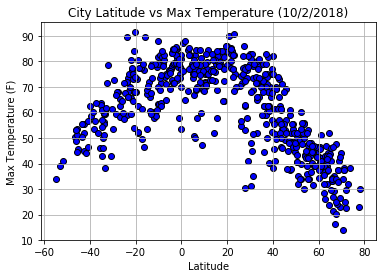

In [6]:
# latitude vs max temperature
x = weather_df["Lat"]
y = weather_df["Max Temp"]

plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs Max Temperature (10/2/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()
plt.savefig("../Images/Latitude_vs_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

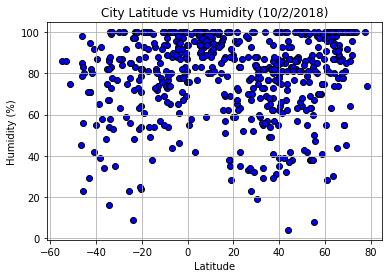

In [7]:
# latitude vs humidity
x = weather_df["Lat"]
y = weather_df["Humidity"]

plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs Humidity (10/2/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()
plt.savefig("../Images/Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

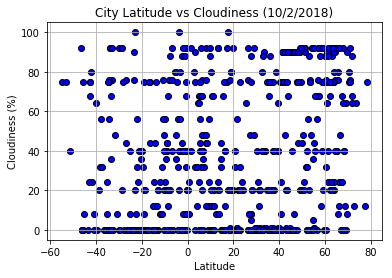

In [8]:
# latitude vs cloudiness
x = weather_df["Lat"]
y = weather_df["Cloudiness"]

plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs Cloudiness (10/2/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()
plt.savefig("../Images/Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

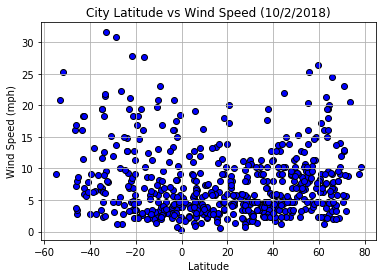

In [9]:
# latitude vs wind speed
x = weather_df["Lat"]
y = weather_df["Wind Speed"]

plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs Wind Speed (10/2/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()
plt.savefig("../Images/Latitude_vs_WindSpeed.png")
plt.show()